# Honours Differential Equations 2019/20 - Project

## Lorenzo Stigliano, s1725018

## Question 1

### PART A

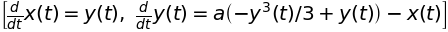

In [1]:
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display_latex

x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")
a = sym.Symbol("a")
b = sym.Symbol("b")
u = sym.Function('u')
v = sym.Function('v')

eq1 = sym.Eq(x(t).diff(t),y(t))
eq2 = sym.Eq(y(t).diff(t),-x(t)+a*(y(t)-(y(t))**3/3))
[eq1, eq2]

In [2]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])
matJ = FG.jacobian([x(t), y(t)])
matJ

⎡0         1      ⎤
⎢                 ⎥
⎢      ⎛     2   ⎞⎥
⎣-1  a⋅⎝1 - y (t)⎠⎦

In [3]:
lin_mat = matJ.subs({x(t):0, y(t):0})
lin_mat * sym.Matrix([u(t),v(t)])

⎡    v(t)     ⎤
⎢             ⎥
⎣a⋅v(t) - u(t)⎦

#### Eigenvectors

In [4]:
lin_mat.eigenvects()[0][2][0],lin_mat.eigenvects()[1][2][0]

⎛⎡      _________________⎤  ⎡      _________________⎤⎞
⎜⎢a   ╲╱ (a - 2)⋅(a + 2) ⎥  ⎢a   ╲╱ (a - 2)⋅(a + 2) ⎥⎟
⎜⎢─ + ───────────────────⎥  ⎢─ - ───────────────────⎥⎟
⎜⎢2            2         ⎥, ⎢2            2         ⎥⎟
⎜⎢                       ⎥  ⎢                       ⎥⎟
⎝⎣           1           ⎦  ⎣           1           ⎦⎠

#### Eigenvalues

In [5]:
evals = list(lin_mat.eigenvals().keys())
evals

#### Behaviour of critical point with changing values of a

In [6]:
evals[0].subs({a:-2})
for i in range(-5,-2):
    print("when a is equal to : " + str(i))
    print("check if they are both less than 0")
    #check if they are both less than 0
    display_latex([evals[0].subs({a:i}) <0 ,evals[1].subs({a:i}) <0 ])
for i in range(-1,2):
    print("when a is equal to : " + str(i))
    print("complex eigenvalues")
    display_latex([evals[0].subs({a:i}) ,evals[1].subs({a:i})])
for i in range(2,5):
    print("when a is equal to : " + str(i))
    print("check if they are both less than 0")  
    #check if they are both less than 0
    display_latex([evals[0].subs({a:i}) < 0 ,evals[1].subs({a:i}) < 0])


when a is equal to : -5
check if they are both less than 0


when a is equal to : -4
check if they are both less than 0


when a is equal to : -3
check if they are both less than 0


when a is equal to : -1
complex eigenvalues


when a is equal to : 0
complex eigenvalues


when a is equal to : 1
complex eigenvalues


when a is equal to : 2
check if they are both less than 0


when a is equal to : 3
check if they are both less than 0


when a is equal to : 4
check if they are both less than 0


### PART B

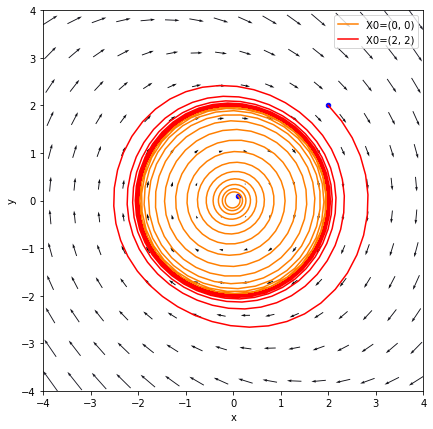

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = x[1]
    v = -x[0]+.1*(x[1]-((x[1]**3)/3))
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-10:10:40j,-10:10:30j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.01, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0.1,0.1],[2,2]]
durations = [[0,200],[0,150]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],1000)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend()
plt.gca().set_aspect(1.0)

plt.show()

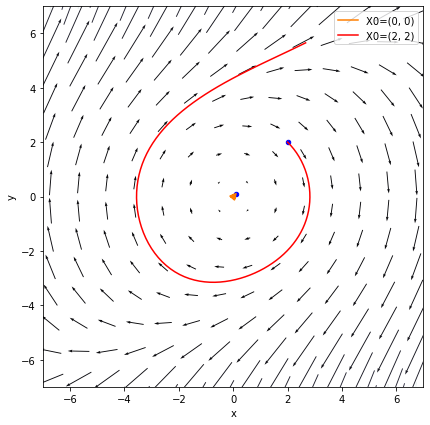

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = x[1]
    v = -1*x[0]-0.1*(x[1]-(x[1]**3)/3)
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-15:15:30j,-15:15:30j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.01, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0.1,0.1],[2,2]]
durations = [[0,200],[0,6]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.legend()
plt.gca().set_aspect(1.0)

plt.show()

## Question 2

#### PART A

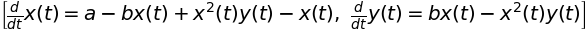

In [9]:
x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")
a = sym.Symbol("a")
b = sym.Symbol("b")
u = sym.Function('u')
v = sym.Function('v')

eq1 = sym.Eq(x(t).diff(t),a - x(t) -b*x(t) +x(t)**2*y(t))
eq2 = sym.Eq(y(t).diff(t),b*x(t)-x(t)**2*y(t))
[eq1, eq2]


In [10]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])

print("a = " + str(sym.solve(FG)[0].get(a)))
print("b = " + str(sym.solve(FG)[0].get(b)))
print("x(t) = a and y(t) = b/a")
sym.solve(FG)

a = x(t)
b = x(t)*y(t)
x(t) = a and y(t) = b/a


In [11]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])
matJ = FG.jacobian([x(t), y(t)])
display_latex(matJ)
lin_mat = matJ.subs({x(t):a, y(t):(b/a)})
print("when we sub in x(t) = a and y(t) = b/a")
display_latex(lin_mat)

when we sub in x(t) = a and y(t) = b/a


#### Eigenvectors

In [12]:
lin_mat.eigenvects()[0][2][0],lin_mat.eigenvects()[1][2][0]

⎛⎡                            2                          ⎤  ⎡                 
⎜⎢                          -a                           ⎥  ⎢                 
⎜⎢───────────────────────────────────────────────────────⎥  ⎢─────────────────
⎜⎢            _______________________________________    ⎥  ⎢            _____
⎜⎢ 2         ╱ ⎛ 2              ⎞ ⎛ 2              ⎞     ⎥  ⎢ 2         ╱ ⎛ 2 
⎜⎢a    b   ╲╱  ⎝a  - 2⋅a - b + 1⎠⋅⎝a  + 2⋅a - b + 1⎠    1⎥, ⎢a    b   ╲╱  ⎝a  
⎜⎢── + ─ + ────────────────────────────────────────── - ─⎥  ⎢── + ─ - ────────
⎜⎢2    2                       2                        2⎥  ⎢2    2           
⎜⎢                                                       ⎥  ⎢                 
⎝⎣                           1                           ⎦  ⎣                 

           2                          ⎤⎞
         -a                           ⎥⎟
──────────────────────────────────────⎥⎟
__________________________________    ⎥⎟
             ⎞ ⎛ 2              ⎞     ⎥⎟
- 2⋅

#### Eigenvalues

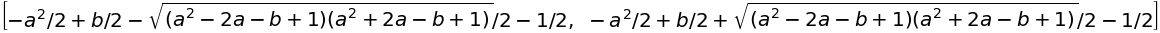

In [13]:
evals = list(lin_mat.eigenvals().keys())
evals

#### PART B

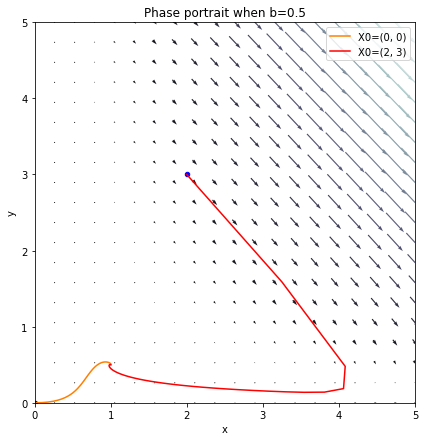

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = 1 - x[0] - 0.5*x[0] + (x[0]**2)*x[1]
    v = 0.5*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,10],[0,10]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.gca().set_aspect(1.0)
plt.title('Phase portrait when b=0.5')

plt.show()

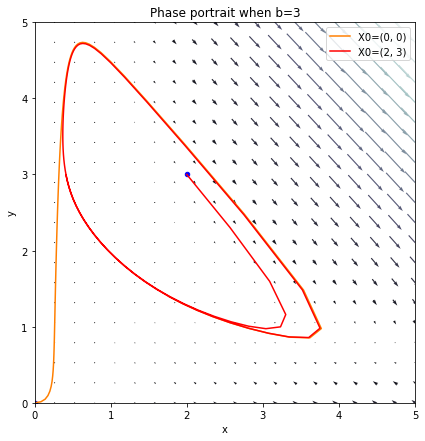

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = 1- x[0] - 3*x[0] + x[0]**2*x[1]
    v = 3*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,10],[0,10]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.gca().set_aspect(1.0)
plt.title('Phase portrait when b=3')

plt.show()

#### PART C

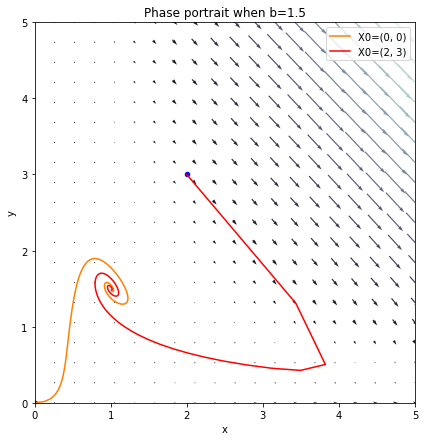

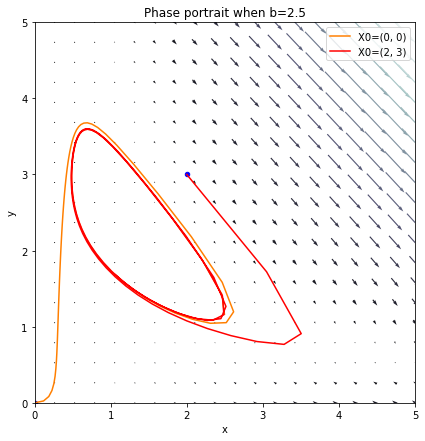

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

bs =[1.5,2.5]
for b in bs:
    
    # Define vector field
    def vField(x,t):
        u = 1 - x[0] - b*x[0] + x[0]**2*x[1]
        v = b*x[0] - x[0]**2*x[1]
        return [u,v]

    # Plot vector field
    X, Y = np.mgrid[0:5:20j,0:5:20j]
    U, V = vField([X,Y],0)

    # define colours for each vector based on their lengths
    M = np.hypot(U, V)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

    # Settings for trajectories
    ics  = [[0,0],[2,3]]
    durations = [[0,15],[0,15]]
    vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

    # plot trajectories
    for i, ic in enumerate(ics):
        t = np.linspace(durations[i][0], durations[i][1],100)
        x = odeint(vField, ic, t)
        ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

    ic_x = [ic[0] for ic in ics]
    ic_y = [ic[1] for ic in ics]
    ax.scatter(ic_x, ic_y, color='blue', s=20)
    # note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

    plt.title('Phase portrait when b=' + str(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.legend()
    plt.gca().set_aspect(1.0)

    plt.show()

In [17]:
#Repeated code from above because when I was restarting the kernel it didn´t sub in the values of a and b into the eienvalues.
x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")
a = sym.Symbol("a")
b = sym.Symbol("b")
u = sym.Function('u')
v = sym.Function('v')

eq1 = sym.Eq(x(t).diff(t),a - x(t) -b*x(t) +x(t)**2*y(t))
eq2 = sym.Eq(y(t).diff(t),b*x(t)-x(t)**2*y(t))
[eq1, eq2]
FG = sym.Matrix([eq1.rhs, eq2.rhs])
matJ = FG.jacobian([x(t), y(t)])
lin_mat = matJ.subs({x(t):a, y(t):(b/a)})
lin_mat.eigenvects()[0][2][0],lin_mat.eigenvects()[1][2][0]
evals = list(lin_mat.eigenvals().keys())

In [18]:
evals[0].subs({a:1,b:1.5})

In [19]:
evals[0].subs({a:1,b:2.5})

#### PART D

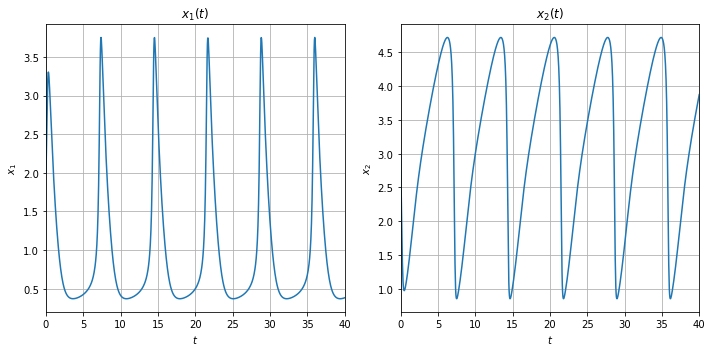

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Define the equation
def dX_dt(X, t):
    x1, x2 = X
    return [1- x1 - 3*x1 + x1**2*x2, 3*x1 - x1**2*x2]
X0 = [2, 3]
t = np.linspace(0, 40, 1000)
Xsol = odeint(dX_dt, X0, t)

axes[0].plot(t, Xsol[:, 0])
axes[0].set_title("$x_1(t)$")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x_1$")
axes[0].set_xlim(0,40)
axes[0].grid(True)

axes[1].plot(t, Xsol[:, 1])
axes[1].set_title("$x_2(t)$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$x_2$")
axes[1].set_xlim(0,40)
axes[1].grid(True)

fig.tight_layout()

plt.show()

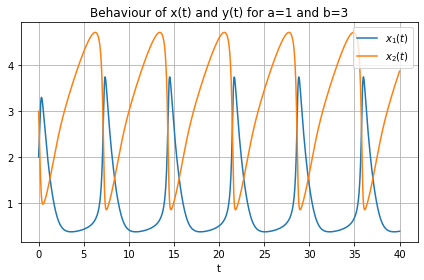

In [21]:
#We want to put the 2 plots above into one graph.

fig, axes = plt.subplots()

axes.plot(t, Xsol[:, 0],label='$x_1(t)$',)
axes.plot(t, Xsol[:, 1],label='$x_2(t)$')
axes.set(xlabel='t',
       title='Behaviour of x(t) and y(t) for a=1 and b=3')
axes.legend()
axes.grid(True)
fig.tight_layout()

plt.show()

## Question 3

#### PART A

In [22]:
def ModifiedEuler(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        h = times[k+1]-t
        x[k+1,:] = x[k,:]+ h*vectorField(x[k,:]+0.5*h*vectorField(x[k,:],t),t + 0.5*h)
    return x

#### PART B

In [23]:
import math
def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

In [24]:
def ModifiedEuler_step(vectorField, start, stop, h, ics):
    t = timesteps(start, stop, h)
    x = ModifiedEuler(vectorField, t, ics)
    return x, t

In [25]:
def equation_dy_dt(y, t):
    return 5*t - 2*y**0.5

In [26]:
from pandas import DataFrame
times = [0,0.1,0.2,0.3,0.4]
values = []
for t in times:
    eq_values, eq_times = ModifiedEuler_step(equation_dy_dt,0,t,0.05,2)
    values.append(eq_values[-1][0])

DataFrame(data = values, index = times, columns = ["Modified euler ,h=0.05"])
#index we have the times we want to estimate for.

,"Modified euler ,h=0.05"
0.0,2.000000
0.1,1.751741
0.2,1.569657
0.3,1.449553
0.4,1.386962


#### PART C

In [27]:
t = sym.symbols('t')
y = sym.Function('y')
eq1 = sym.Eq(y(t).diff(t), 5*t-2*(y(t)**0.5))
eq1sol1 = sym.dsolve(eq1, y(t), ics={y(0):2})

In [28]:
eq1sol1

In [29]:
#Got all the terms excluding the O(t**6) because it was too small from the equation above.
#Here we define the equation as a function:
def y(t):
    return 2 - 2.82842712474619*t + 3.5*t**2 - 0.58925565098879*t**3 - 0.208333333333333*t**4 + 0.0220970869120796*t**5

#### PART D

In [30]:
def Euler(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        x[k+1,:] = x[k,:]+(times[k+1]-t)*vectorField(x[k,:],t)
    return x

In [31]:
def Euler_step(vectorField, start, stop, h, ics):
    t = timesteps(start, stop, h)
    x = Euler(vectorField, t, ics)
    return x, t

In [32]:
ts = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
me_vals = []
e_vals = []
exact_vals = []

for t in ts:
    me_values, eq_times = ModifiedEuler_step(equation_dy_dt,0,t,0.05,2)
    e_values, eq_times = Euler_step(equation_dy_dt,0,t,0.05,2)
    exact = y(t)
    
    me_vals.append(me_values[-1][0])
    e_vals.append(e_values[-1][0])
    exact_vals.append(exact)
    

In [33]:
from pandas import DataFrame
data = {
    "Euler, h=0.05":e_vals,
    "Modified Euler, h=0.05":me_vals,
    "Exact":exact_vals
}
a = DataFrame(data = data, index = ts)
a

,"Euler, h=0.05","Modified Euler, h=0.05",Exact
0.0,2.000000,2.000000,2.000000
0.1,1.734749,1.751741,1.751547
0.2,1.537944,1.569657,1.569274
0.3,1.405438,1.449553,1.448928
0.4,1.332687,1.386962,1.385810
0.5,1.314973,1.377377,1.374799
1.0,1.906060,1.990196,1.896081


In [34]:
ts = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 1.0]
me_vals = []
e_vals = []
exact_vals = []

for t in ts:
    me_values, eq_times = ModifiedEuler_step(equation_dy_dt,0,t,0.05,2)
    e_values, eq_times = Euler_step(equation_dy_dt,0,t,0.05,2)
    exact = y(t)
    
    me_vals.append(me_values[-1][0])
    e_vals.append(e_values[-1][0])
    exact_vals.append(exact)

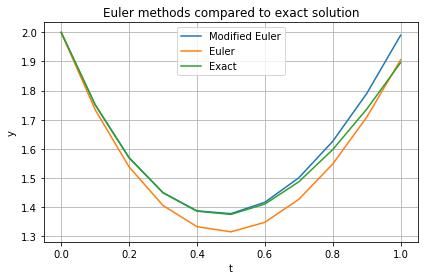

In [35]:
fig, axes = plt.subplots()

axes.plot(ts, me_vals,label='Modified Euler',)
axes.plot(ts, e_vals,label='Euler')
axes.plot(ts, exact_vals,label='Exact')
axes.set(xlabel='t',ylabel = "y",
       title='Euler methods compared to exact solution')
axes.legend()
axes.grid(True)
fig.tight_layout()

plt.show()

## Question 4

#### PART A

In [36]:
def Rossler_dX_dt(X, t):
    x, y, z = X
    return [-y-z, x+(1/5)*y, (1/5) + (x-(5/2))*z]

X0 = [0, 0, 0]
t = np.linspace(0, 100, 2000)
Xsol = odeint(Rossler_dX_dt, X0, t)

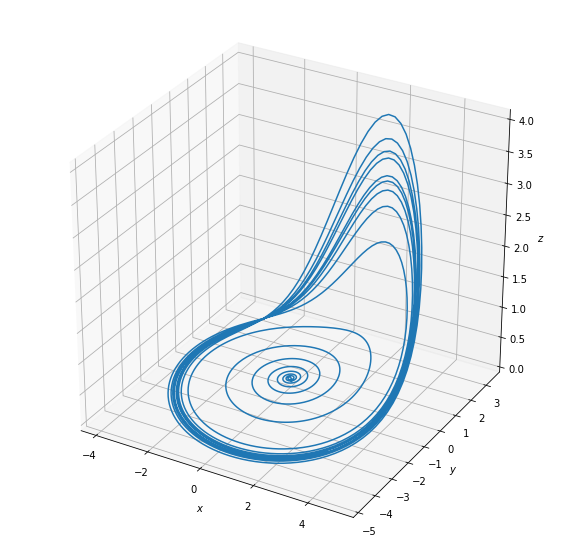

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Set up figure & 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the solution
plt.plot(Xsol[:, 0], Xsol[:, 1], Xsol[:, 2])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

#### PART B

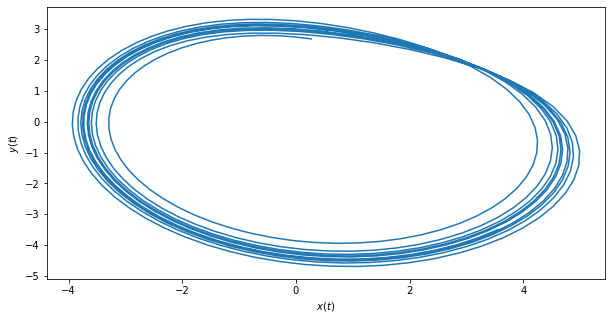

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

t = np.linspace(0, 100, 1000)
Xsol = odeint(Rossler_dX_dt, X0, t)
plt.plot(Xsol[:, 0][440:],Xsol[:, 1][440:])

ax.set_xlabel('$x(t)$')
ax.set_ylabel('$y(t)$')

plt.show()

#### PART C

In [39]:
def Rossler_dX_dt_3(X, t):
    x, y, z = X
    return [-y-z, x+(1/5)*y, (1/5) + (x-3)*z]

X0 = [0, 0, 0]
t = np.linspace(0, 100, 2000)
Xsol_3 = odeint(Rossler_dX_dt_3, X0, t)

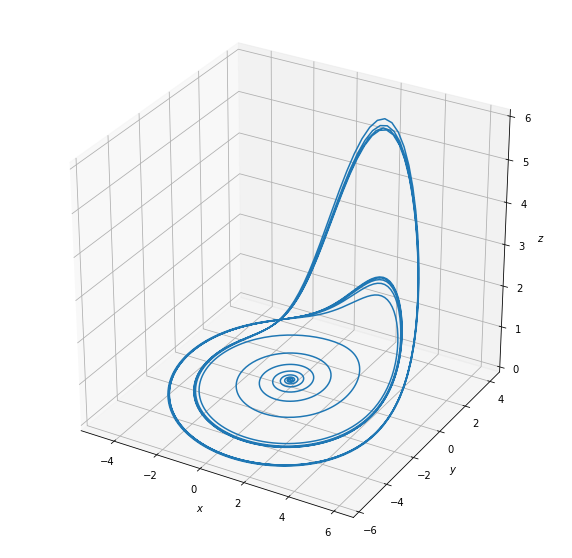

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Set up figure & 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the solution
plt.plot(Xsol_3[:, 0], Xsol_3[:, 1], Xsol_3[:, 2])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

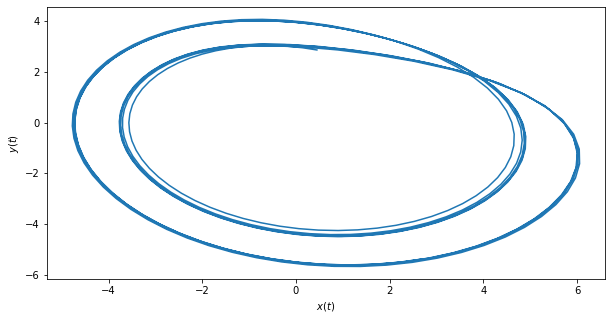

In [41]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

t = np.linspace(0, 100, 1000)
Xsol = odeint(Rossler_dX_dt_3, X0, t)
plt.plot(Xsol[:, 0][440:],(Xsol[:, 1][440:]))

ax.set_xlabel('$x(t)$')
ax.set_ylabel('$y(t)$')

plt.show()